In [1]:
# Basic Libraries
import json
import statistics
import math

from collections import defaultdict

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt  # we only need pyplot

sb.set()  # set the default Seaborn style for graphics

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('non_zero_data.csv')
print("Number of movies:", len(df))
df.head(1)

Number of movies: 5745


,adult,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,revenue,production_companies,budget,release_year,release_month,num_genres,release_season,budget_revenue_ratio
0,False,"[18, 80]",278,en,136.776,1994-09-23,The Shawshank Redemption,8.704,25822,28341469.0,['Castle Rock Entertainment'],25000000.0,1994,9,2,Fall,0.8821


In [4]:
#Drop non-essential columns to classification
df.drop(['adult','id','title'], axis=1, inplace=True)

In [5]:
df.head(1)

,genre_ids,original_language,popularity,release_date,vote_average,vote_count,revenue,production_companies,budget,release_year,release_month,num_genres,release_season,budget_revenue_ratio
0,"[18, 80]",en,136.776,1994-09-23,8.704,25822,28341469.0,['Castle Rock Entertainment'],25000000.0,1994,9,2,Fall,0.8821


Summary Statistics for Popularity Score:
count    5745.000000
mean       35.501507
std        38.159271
min         0.600000
25%        20.756000
50%        27.424000
75%        39.597000
max      1398.123000
Name: popularity, dtype: float64


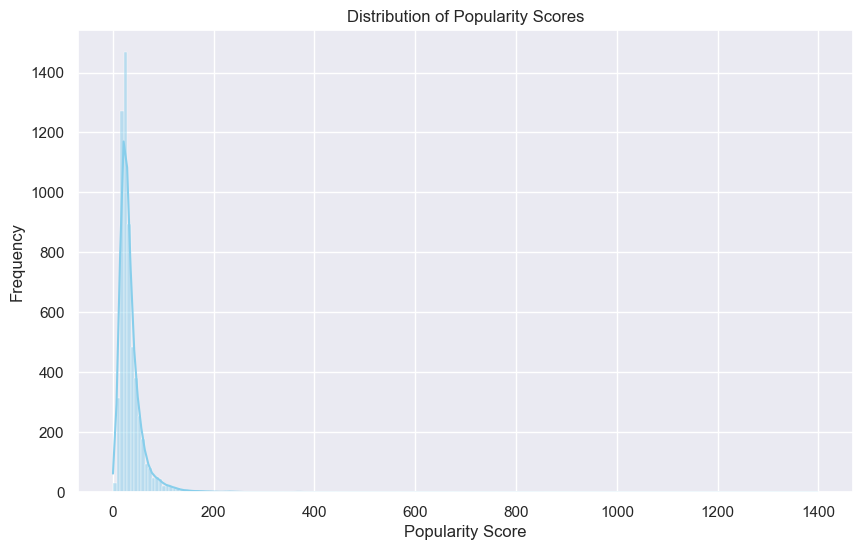

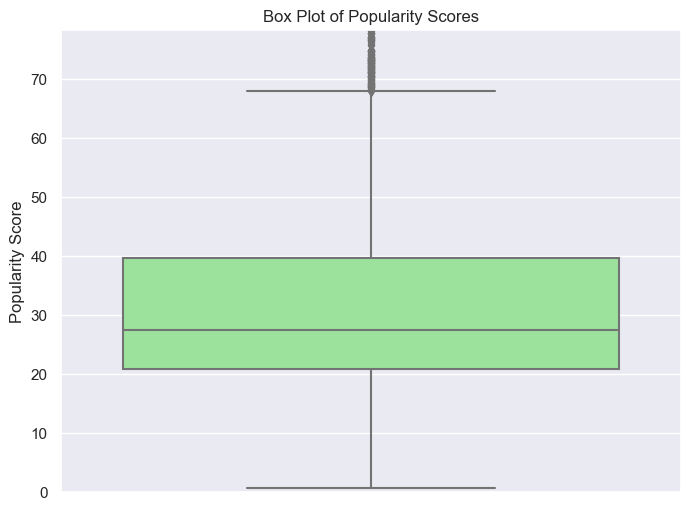

In [6]:
# Summary statistics
print("Summary Statistics for Popularity Score:")
print(df['popularity'].describe())

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Define the columns to be normalized
columns_to_normalize = ['budget', 'revenue', 'vote_count']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Visualize distribution with histogram
plt.figure(figsize=(10, 6))
sb.histplot(df['popularity'], bins=200, kde=True, color='skyblue')
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

# Visualize distribution with box plot
plt.figure(figsize=(8, 6))
sb.boxplot(data=df, y='popularity', color='lightgreen')
plt.title('Box Plot of Popularity Scores')
plt.ylabel('Popularity Score')
plt.ylim(0, df['popularity'].quantile(0.95)) 
plt.show()

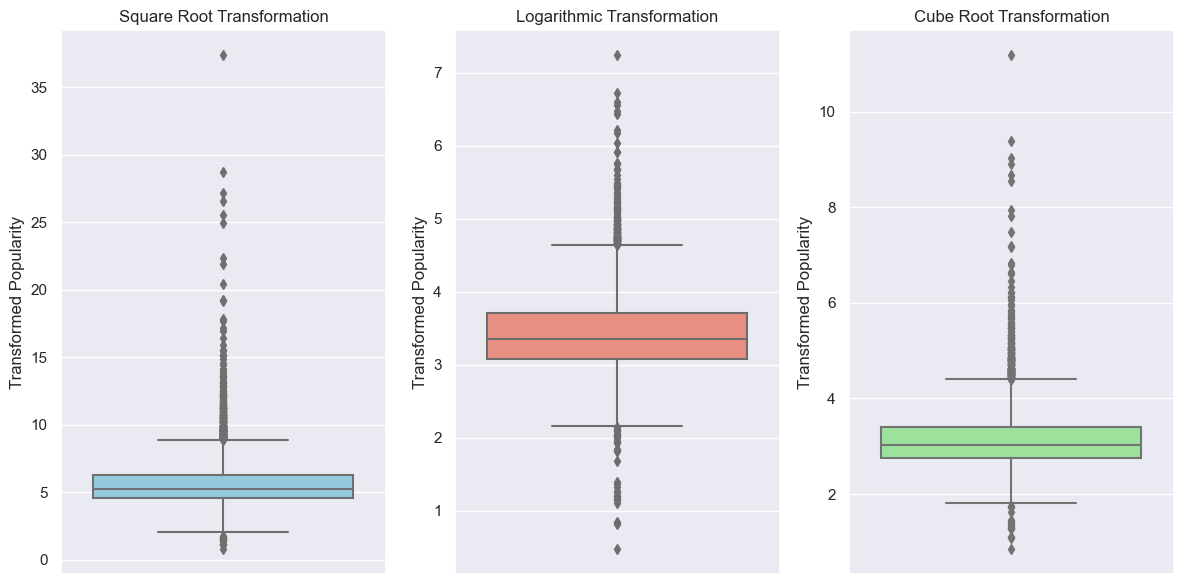

In [7]:
#Data is heavily right-skewed, apply log transformation

# Apply square root transformation to popularity column
df['sqrt_popularity'] = df['popularity'].apply(lambda x: x ** 0.5)

# Apply logarithmic transformation to popularity column (avoiding zero values)
df['log_popularity'] = df['popularity'].apply(lambda x: np.log(x + 1))  # Add 1 to avoid log(0)

# Apply cube root transformation to popularity column (avoiding zero values)
df['cbrt_popularity'] = df['popularity'].apply(lambda x: np.cbrt(x))

# Plot boxplots for all three transformed popularity columns
plt.figure(figsize=(12, 6))

# Square Root Transformation
plt.subplot(1, 3, 1)
sb.boxplot(data=df, y='sqrt_popularity', color='skyblue')
plt.title('Square Root Transformation')
plt.ylabel('Transformed Popularity')

# Logarithmic Transformation
plt.subplot(1, 3, 2)
sb.boxplot(data=df, y='log_popularity', color='salmon')
plt.title('Logarithmic Transformation')
plt.ylabel('Transformed Popularity')

# Cube Root Transformation
plt.subplot(1, 3, 3)
sb.boxplot(data=df, y='cbrt_popularity', color='lightgreen')
plt.title('Cube Root Transformation')
plt.ylabel('Transformed Popularity')

plt.tight_layout()
plt.show()

count    5745.000000
mean        3.419962
std         0.535199
min         0.470004
25%         3.079890
50%         3.347234
75%         3.703694
max         7.243601
Name: log_popularity, dtype: float64


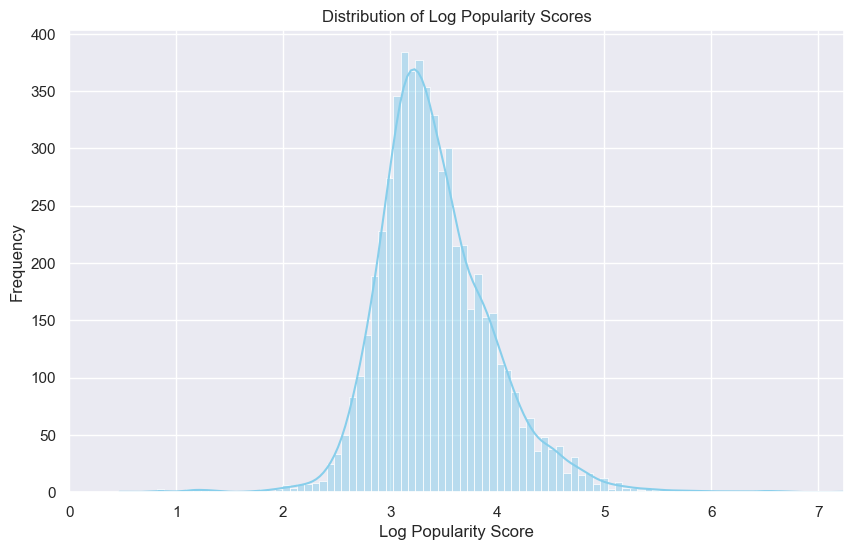

In [8]:
# From this, I can see that log transformation is most relavant
# Visualize distribution with histogram
print(df['log_popularity'].describe())

plt.figure(figsize=(10, 6))
sb.histplot(df['log_popularity'], bins='auto', kde=True, color='skyblue')
plt.title('Distribution of Log Popularity Scores')
plt.xlabel('Log Popularity Score')
plt.ylabel('Frequency')
plt.xlim(0, np.log(df['popularity'].max() + 1))  # Adjust x-axis limits for log-transformed data
plt.show()



In [9]:
# Set threshold on log popularity scale (3rd quartile)
threshold_log_popularity = 3.703694

# Convert threshold to original popularity scale
threshold_original_popularity = np.exp(threshold_log_popularity)

# Classify movies based on original popularity scores
df['is_highly_popular'] = df['popularity'] >= threshold_original_popularity

# Display classification results
print("Threshold on Log Popularity Scale:", threshold_log_popularity)
print("Threshold on Original Popularity Scale:", threshold_original_popularity)
print("Number of highly popular movies:", df['is_highly_popular'].sum())
print("Number of not highly popular movies:", len(df) - df['is_highly_popular'].sum())

Threshold on Log Popularity Scale: 3.703694
Threshold on Original Popularity Scale: 40.596993007088166
Number of highly popular movies: 1374
Number of not highly popular movies: 4371


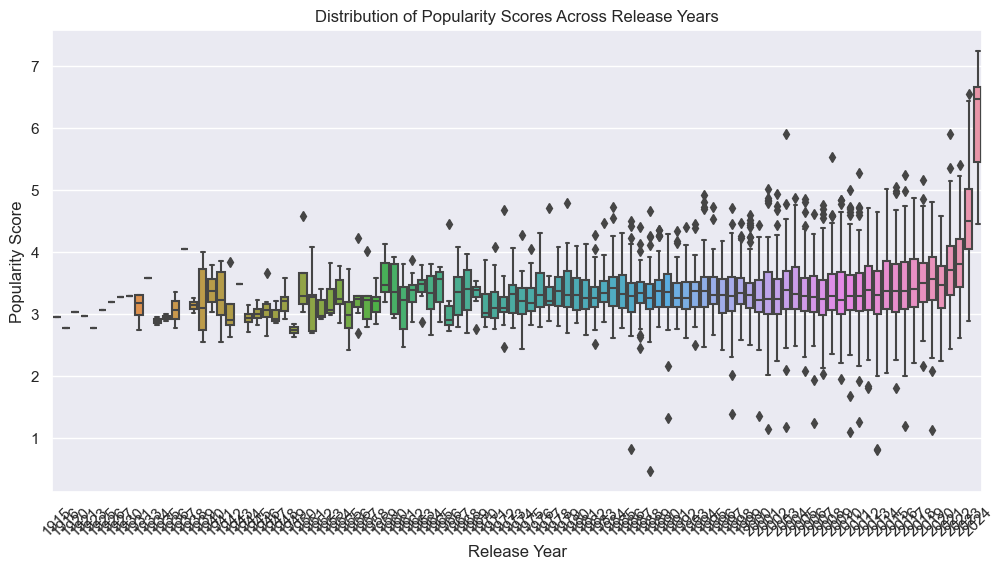

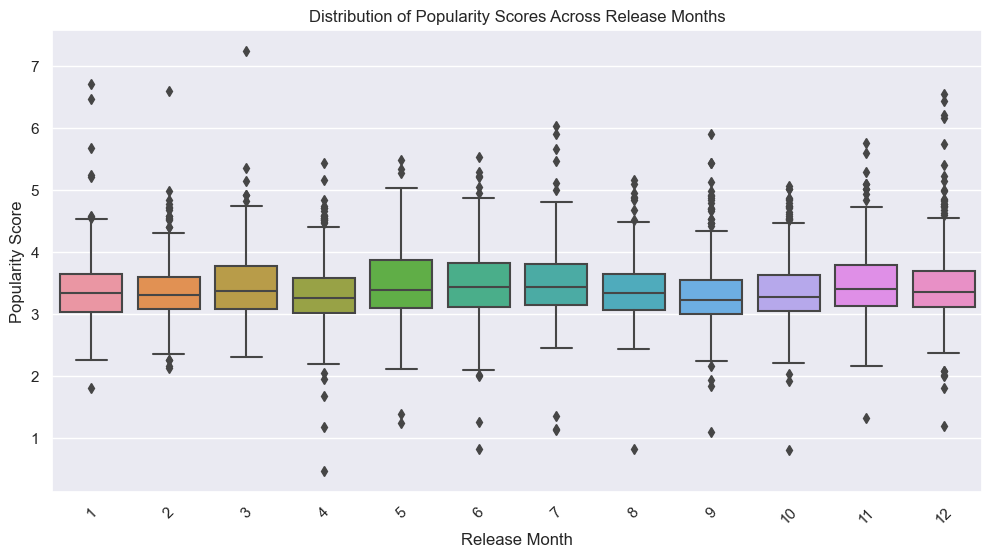

In [10]:
#Temporal Analysis

# Plot distribution of popularity scores across release years
plt.figure(figsize=(12, 6))
sb.boxplot(x='release_year', y='log_popularity', data=df)
plt.title('Distribution of Popularity Scores Across Release Years')
plt.xlabel('Release Year')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45)
plt.show()

# Plot distribution of popularity scores across release months
plt.figure(figsize=(12, 6))
sb.boxplot(x='release_month', y='log_popularity', data=df)
plt.title('Distribution of Popularity Scores Across Release Months')
plt.xlabel('Release Month')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45)
plt.show()

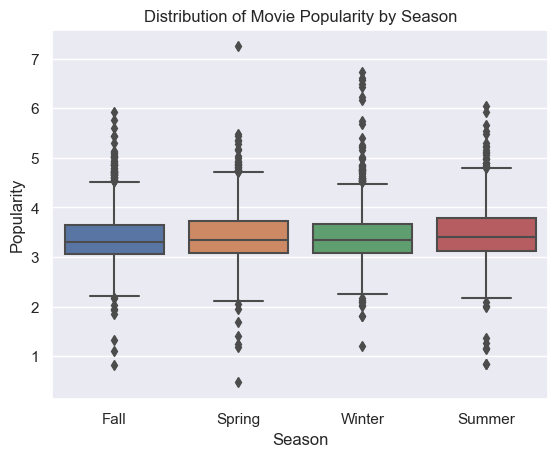

In [11]:
# Plot distribution of movie popularity by season
sb.boxplot(data=df, x='release_season', y='log_popularity')
plt.title('Distribution of Movie Popularity by Season')
plt.xlabel('Season')
plt.ylabel('Popularity')
plt.show()

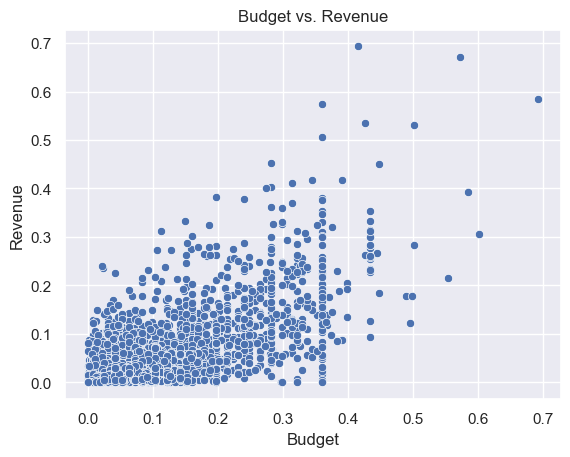

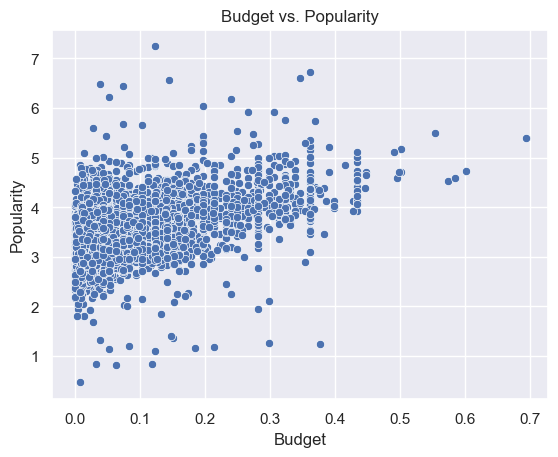

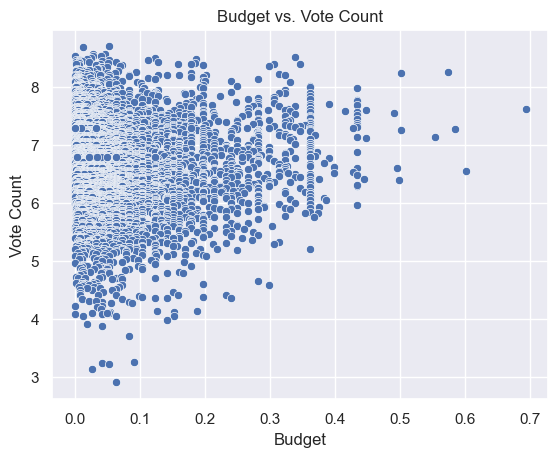

In [12]:
#BUDGET RELATED ANALYSIS

# Apply logarithmic transformation to budget
df['log_budget'] = np.log1p(df['budget'])
df['log_revenue'] = np.log1p(df['revenue'])
df['log_vote_count'] = np.log1p(df['vote_count'])

# Scatter plot of budget vs. revenue
sb.scatterplot(data=df, x='log_budget', y='log_revenue')
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

# Scatter plot of budget vs. popularity
sb.scatterplot(data=df, x='log_budget', y='log_popularity')
plt.title('Budget vs. Popularity')
plt.xlabel('Budget')
plt.ylabel('Popularity')
plt.show()

# Scatter plot of budget vs. vote average
sb.scatterplot(data=df, x='log_budget', y='vote_average')
plt.title('Budget vs. Vote Count')
plt.xlabel('Budget')
plt.ylabel('Vote Count')
plt.show()


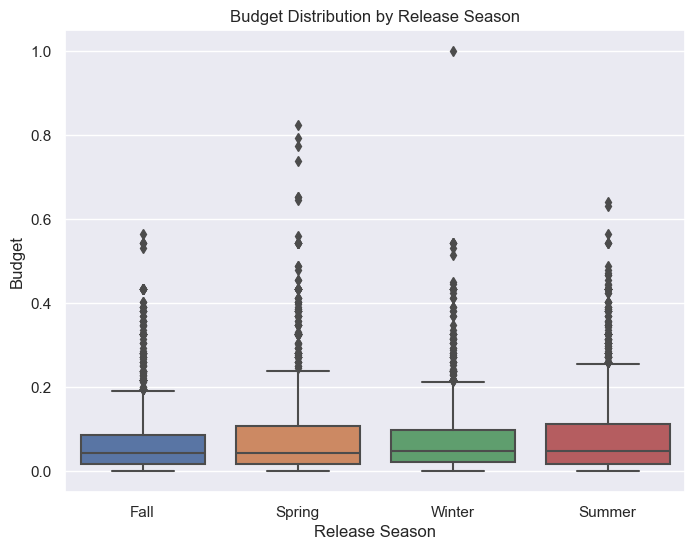

In [13]:
# Box plot of budget by release season
plt.figure(figsize=(8, 6))
sb.boxplot(data=df, x='release_season', y='budget')
plt.title('Budget Distribution by Release Season')
plt.xlabel('Release Season')
plt.ylabel('Budget')
plt.show()

In [14]:
revenue_zero_mask = df['revenue'] <=10000000
budget_zero_mask = df['budget'] == 0

# Segment the data based on zero values for revenue and budget
revenue_zero_data = df[revenue_zero_mask]
budget_zero_data = df[budget_zero_mask]

# Display the sizes of each segment
print("Number of rows", len(revenue_zero_data))

Number of rows 5745


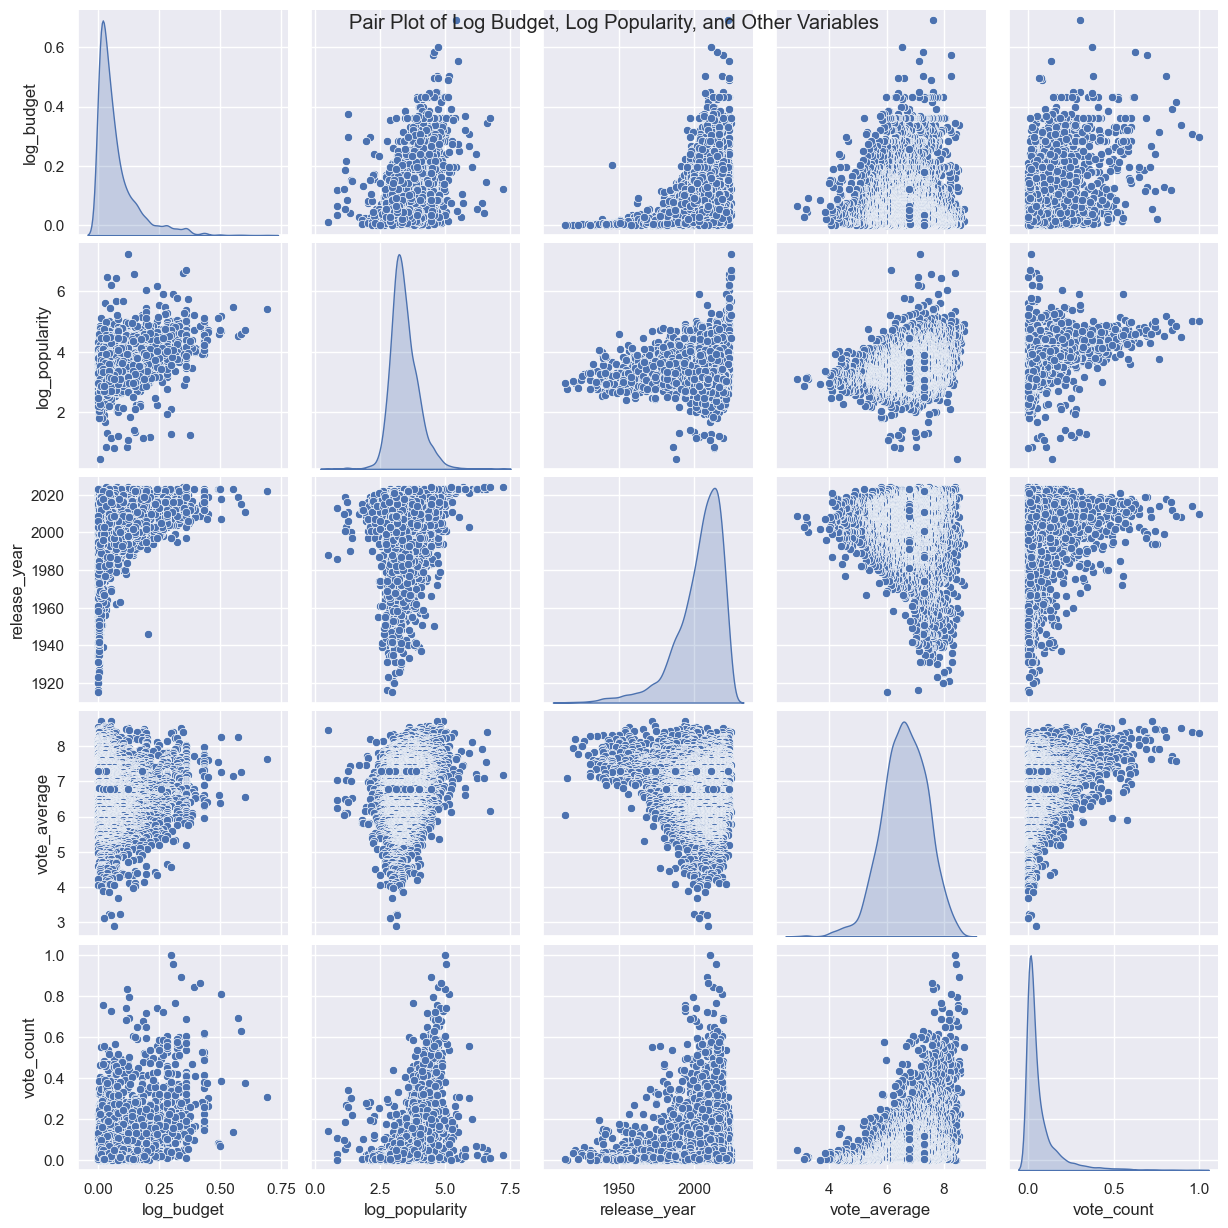

In [15]:
# Select relevant columns for pair plot
cols = ['log_budget', 'log_popularity', 'release_year', 'vote_average', 'vote_count']

# Create pair plot
sb.pairplot(df[cols], diag_kind='kde')
plt.suptitle('Pair Plot of Log Budget, Log Popularity, and Other Variables')
plt.show()